In [5]:
"""
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle
"""

'\nCreated on Sun Apr  9 00:25:54 2023\n@author: Fernandez, Maria Giselle\n'

In [6]:
# Required Libraries: Import the libraries essential for plotting and numerical operations.
import matplotlib.pyplot as plt
import numpy as np

# Surrogate Model: Import the co-Kriging model from OpenMDAO for multi-fidelity analysis.
from openmdao.surrogate_models.multifi_cokriging import MultiFiCoKriging as coKG


In [17]:
# '''Examples
# --------
# >>> from openmdao.surrogate_models.multifi_cokriging import MultiFiCoKriging
# >>> import numpy as np
# >>> # Xe: DOE for expensive code (nested in Xc)
# >>> # Xc: DOE for cheap code
# >>> # ye: expensive response
# >>> # yc: cheap response
# >>> Xe = np.array([[0],[0.4],[1]])
# >>> Xc = np.vstack((np.array([[0.1],[0.2],[0.3],[0.5],[0.6],[0.7],[0.8],[0.9]]),Xe))
# >>> ye = ((Xe*6-2)**2)*np.sin((Xe*6-2)*2)
# >>> yc = 0.5*((Xc*6-2)**2)*np.sin((Xc*6-2)*2)+(Xc-0.5)*10. - 5
# >>> model = MultiFiCoKriging(theta0=1, thetaL=1e-5, thetaU=50.)
# >>> model.fit([Xc, Xe], [yc, ye])
# >>> # Prediction on x=0.05
# >>> np.abs(float(model.predict([0.05])[0])- ((0.05*6-2)**2)*np.sin((0.05*6-2)*2)) < 0.05
# True'''

In [13]:

# High-Fidelity (HF) Model
def func_HF(x):
    return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1) ** 2

# Low-Fidelity (LF) Model
def func_LF(x):
    # Model parameters: A, B, C are not used in this implementation
    return 1.4 * x * np.sin(20 * x + 2) + 7 * np.exp(x) + 14 * (x - 1) ** 2 + 10 * x

# Boundary Limits
lb, ub = 0, 1

# Generating Evaluation Points for LF and HF models
x = np.linspace(lb, ub, 100)
fHF = func_HF(x)
fLF = func_LF(x)

# Experiment Design: Points where HF and LF models are evaluated
Xe = np.array([[0.2], [0.4], [0.85]])  # For HF model
Xc = np.vstack((np.array([[0.1], [0.25], [0.3], [0.5], [0.6], [0.7], [0.8], [0.9]]), Xe))  # For LF model
ye = func_HF(Xe)  # Response from HF model
yc = func_LF(Xc)  # Response from LF model

# Initialize the co-Kriging model (Not Defined in Code Snippet)
ndmodel = coKG()
ndmodel.fit([Xc, Xe], [yc, ye])  # Model Training
f_pred = ndmodel.predict(x.reshape(-1, 1))  # Prediction



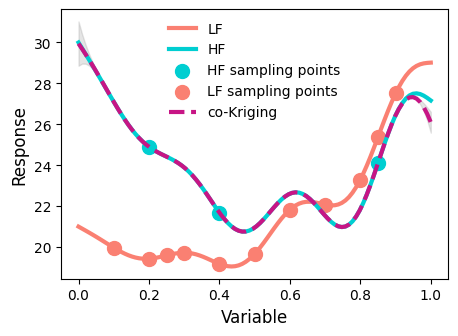

In [14]:

# Initialize Figure: Set the figure size for visualization.
plt.figure(figsize=[5, 3.5])

# Plotting Low-Fidelity Model: The LF model is visualized with a continuous line in the 'salmon' color scheme.
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')

# Plotting High-Fidelity Model: The HF model is visualized with a continuous line in the 'darkturquoise' color scheme.
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# HF Sampling Points: Scatter plot of the HF evaluation points (Xe) and their corresponding responses (ye).
plt.scatter(Xe, ye, 100, c='darkturquoise', label='HF sampling points')

# LF Sampling Points: Scatter plot of the LF evaluation points (Xc) and their corresponding responses (yc).
plt.scatter(Xc, yc, 100, c='salmon', label='LF sampling points')

# Co-Kriging Prediction: The predicted response using the co-Kriging model is visualized using a dashed line in the 'mediumvioletred' color scheme.
plt.plot(x, f_pred[0], '--', c='mediumvioletred', linewidth=3, label='co-Kriging')

# Prediction Confidence Interval: Shading the area representing the confidence interval of the co-Kriging prediction.
plt.fill_between(x, (f_pred[0] - f_pred[1]).reshape(len(x)), (f_pred[0] + f_pred[1]).reshape(len(x)), color='gray', alpha=0.2)

# Legend: Add a legend to the plot without a frame to improve visual clarity.
plt.legend(frameon=False)

# Axes Labels: Add labels to the x and y-axes to clarify the plotted variables.
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Display Plot: Render the figure.
plt.show()

# Save Figure (Optional): The figure can be saved as a high-resolution PNG file. This line is commented out in the original code.
# plt.savefig('Functions.png', dpi=1000, bbox_inches='tight', transparent=True)


/var/folders/f7/xpt8t94x6xl8vsmqsbxt7ktm001t2c/T/ipykernel_13898/69805140.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i+1)


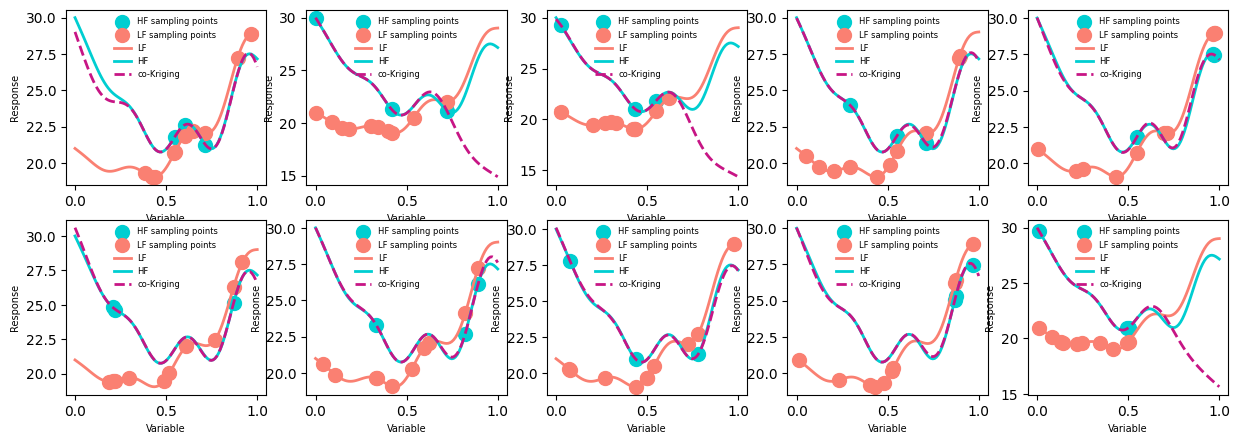

In [15]:

# Initialize Figure: Set up the plot figure with specific dimensions tailored for better visibility.
plt.figure(figsize=[15, 5])

# Low-Fidelity and High-Fidelity Initial Plots: Plot both models as a backdrop for subplots.
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Iterative Subplots: Create multiple subplots to showcase varying sampling points and predictions.
for i in range(10):
    # Subplot Configuration: Initialize the ith subplot in a 2x5 grid.
    plt.subplot(2, 5, i+1)
    
    # Random Seed: Ensure reproducibility of random numbers.
    np.random.seed(i)
    
    # Generate Sampling Points: Randomly generate High-Fidelity (Xe) and Low-Fidelity (Xc) sampling points.
    Xe = np.random.rand(3).reshape(-1, 1)
    Xc = np.vstack((np.random.rand(7).reshape(-1, 1), Xe))
    
    # Compute Responses: Evaluate the HF and LF functions at the sampling points.
    ye = func_HF(Xe)
    yc = func_LF(Xc)
    
    # Co-Kriging Model: Initialize and fit the co-Kriging model.
    ndmodel = coKG()
    ndmodel.fit([Xc, Xe], [yc, ye])
    
    # Prediction: Utilize the co-Kriging model to predict values over the defined variable range.
    f_pred = ndmodel.predict(x.reshape(-1, 1))

    # Plot Sampling Points: Represent HF and LF evaluation points as scatter plots.
    plt.scatter(Xe, ye, 100, c='darkturquoise', label='HF sampling points')
    plt.scatter(Xc, yc, 100, c='salmon', label='LF sampling points')
    
    # Overlay LF and HF Plots: Add lighter versions of initial LF and HF plots.
    plt.plot(x, fLF, c='salmon', linewidth=2, label='LF')
    plt.plot(x, fHF, c='darkturquoise', linewidth=2, label='HF')
    
    # Co-Kriging Prediction Plot: Superimpose the co-Kriging prediction on each subplot.
    plt.plot(x, f_pred[0], '--', c='mediumvioletred', linewidth=2, label='co-Kriging')
    
    # Legend and Axis Labels: Add a scaled-down legend and axis labels for each subplot.
    plt.legend(frameon=False, fontsize=6)
    plt.xlabel('Variable', fontsize=7)
    plt.ylabel('Response', fontsize=7)

# Show Figure: Render the composite figure comprising all subplots.
plt.show()

# Optional Save: Uncomment to save the figure as a high-resolution PNG file.
# plt.savefig('Functions.png', dpi=1000, bbox_inches='tight', transparent=True)
